# Lab 5

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
import matplotlib.pyplot as plt

In [161]:
data = pd.read_csv('Admission_Predict.csv', header = None)
data = data.drop(0,0)
data = data.astype(float)
data.head(5)

,0,1,2,3,4,5,6,7,8
1,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
2,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
3,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
4,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
5,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [162]:
data = data.assign(v_1 = 1)
y = data[[8]].to_numpy()
X = data[['v_1',1,2,3,4,5,6,7]].to_numpy()
print(X.shape)
print(y.shape)

(400, 8)
(400, 1)


In [163]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(240, 8)
(80, 8)
(80, 8)
(240, 1)
(80, 1)
(80, 1)


In [164]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [165]:
m, n = X_train.shape

In [166]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(8, 1)


In [167]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.000000001, threshold = 0.00001, max_iter=10000):
    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs

## Grado 1

In [168]:
thetas, costs = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient)

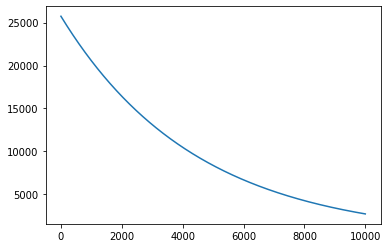

In [169]:
plt.plot(costs)

### test

In [170]:
thetas, costs = gradient_descent(X_test,y_test,theta_0,linear_cost,linear_cost_gradient)

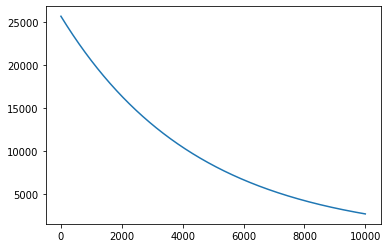

In [171]:
plt.plot(costs)

### validation

In [172]:
thetas, costs = gradient_descent(X_val,y_val,theta_0,linear_cost,linear_cost_gradient)

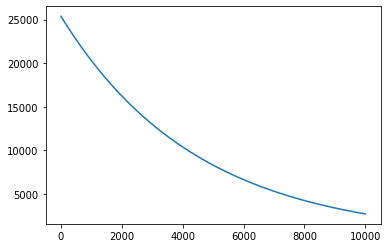

In [173]:
plt.plot(costs)

Como se observa en las gráficas, utilizando un polinomio grado 1 el modelo muestra un descenso, pero con 10,000 iteraciones no parece alcanzar convergencia esperada. 

## Grado 2

In [174]:
data[9] = data[1] ** 2
data[10] = data[2] ** 2
data[11] = data[3] ** 2
data[12] = data[4] ** 2
data[13] = data[5] ** 2
data[14] = data[6] ** 2
data[15] = data[7] ** 2
data

,0,1,2,3,4,5,6,7,8,v_1,9,10,11,12,13,14,15
1,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92,1,113569.0,13924.0,16.0,20.25,20.25,93.1225,1.0
2,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76,1,104976.0,11449.0,16.0,16.00,20.25,78.6769,1.0
3,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72,1,99856.0,10816.0,9.0,9.00,12.25,64.0000,1.0
4,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80,1,103684.0,12100.0,9.0,12.25,6.25,75.1689,1.0
5,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65,1,98596.0,10609.0,4.0,4.00,9.00,67.4041,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,396.0,324.0,110.0,3.0,3.5,3.5,9.04,1.0,0.82,1,104976.0,12100.0,9.0,12.25,12.25,81.7216,1.0
397,397.0,325.0,107.0,3.0,3.0,3.5,9.11,1.0,0.84,1,105625.0,11449.0,9.0,9.00,12.25,82.9921,1.0
398,398.0,330.0,116.0,4.0,5.0,4.5,9.45,1.0,0.91,1,108900.0,13456.0,16.0,25.00,20.25,89.3025,1.0
399,399.0,312.0,103.0,3.0,3.5,4.0,8.78,0.0,0.67,1,97344.0,10609.0,9.0,12.25,16.00,77.0884,0.0


In [175]:
data = data.assign(v_1 = 1)
y = data[[8]].to_numpy()
X = data[['v_1',1,4,5,6,7,9,10,11,12,13,14,15]].to_numpy()
print(y.shape)
print(X.shape)

(400, 1)
(400, 13)


In [176]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(240, 13)
(80, 13)
(80, 13)
(240, 1)
(80, 1)
(80, 1)


In [177]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [178]:
m, n = X_train.shape

In [179]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(13, 1)


In [180]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.00000000000000001, threshold = 0.000000001, max_iter=10000):
    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs

In [181]:
thetas, costs = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient)

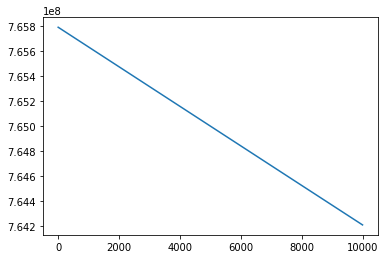

In [182]:
plt.plot(costs)

### test

In [183]:
thetas, costs = gradient_descent(X_test,y_test,theta_0,linear_cost,linear_cost_gradient)

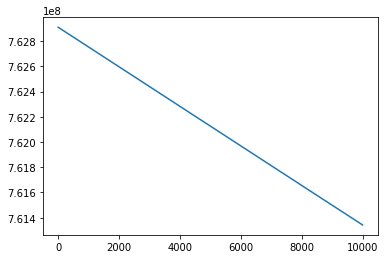

In [184]:
plt.plot(costs)

### validation

In [185]:
thetas, costs = gradient_descent(X_val,y_val,theta_0,linear_cost,linear_cost_gradient)

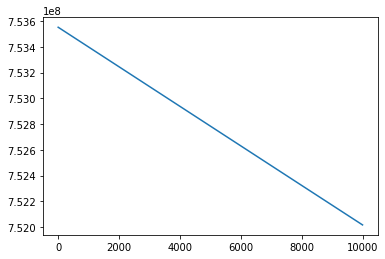

In [186]:
plt.plot(costs)

Como se observa en las gráficas, utilizando un polinomio grado 2 el modelo muestra un descenso más recto que en el grado 1, lo cual refleja que estamos más lejos de la convergencia en este modelo tampoco llegamos a ver convergencia con 10,000 iteraciones.


## Grado 3

In [187]:
data[9] = data[1] ** 2
data[10] = data[2] ** 2
data[11] = data[3] ** 2
data[12] = data[4] ** 2
data[13] = data[5] ** 2
data[14] = data[6] ** 2
data[15] = data[7] ** 2
data[16] = data[1] ** 3
data[17] = data[2] ** 3
data[18] = data[3] ** 3
data[19] = data[4] ** 3
data[20] = data[5] ** 3
data[21] = data[6] ** 3
data[22] = data[7] ** 3
data

,0,1,2,3,4,5,6,7,8,v_1,...,13,14,15,16,17,18,19,20,21,22
1,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92,1,...,20.25,93.1225,1.0,38272753.0,1643032.0,64.0,91.125,91.125,898.632125,1.0
2,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76,1,...,20.25,78.6769,1.0,34012224.0,1225043.0,64.0,64.000,91.125,697.864103,1.0
3,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72,1,...,12.25,64.0000,1.0,31554496.0,1124864.0,27.0,27.000,42.875,512.000000,1.0
4,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80,1,...,6.25,75.1689,1.0,33386248.0,1331000.0,27.0,42.875,15.625,651.714363,1.0
5,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65,1,...,9.00,67.4041,0.0,30959144.0,1092727.0,8.0,8.000,27.000,553.387661,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,396.0,324.0,110.0,3.0,3.5,3.5,9.04,1.0,0.82,1,...,12.25,81.7216,1.0,34012224.0,1331000.0,27.0,42.875,42.875,738.763264,1.0
397,397.0,325.0,107.0,3.0,3.0,3.5,9.11,1.0,0.84,1,...,12.25,82.9921,1.0,34328125.0,1225043.0,27.0,27.000,42.875,756.058031,1.0
398,398.0,330.0,116.0,4.0,5.0,4.5,9.45,1.0,0.91,1,...,20.25,89.3025,1.0,35937000.0,1560896.0,64.0,125.000,91.125,843.908625,1.0
399,399.0,312.0,103.0,3.0,3.5,4.0,8.78,0.0,0.67,1,...,16.00,77.0884,0.0,30371328.0,1092727.0,27.0,42.875,64.000,676.836152,0.0


In [188]:
data = data.assign(v_1 = 1)
y = data[[8]].to_numpy()
X = data[['v_1',1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].to_numpy()
print(y.shape)
print(X.shape)

(400, 1)
(400, 22)


In [189]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(240, 22)
(80, 22)
(80, 22)
(240, 1)
(80, 1)
(80, 1)


In [190]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [191]:
m, n = X_train.shape

In [192]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(22, 1)


In [237]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.0000000000000000001, threshold = 0.00000001, max_iter=10000):
    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs

In [238]:
thetas, costs = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient)

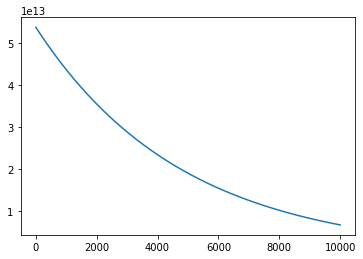

In [239]:
plt.plot(costs)

### test

In [240]:
thetas, costs = gradient_descent(X_test,y_test,theta_0,linear_cost,linear_cost_gradient)

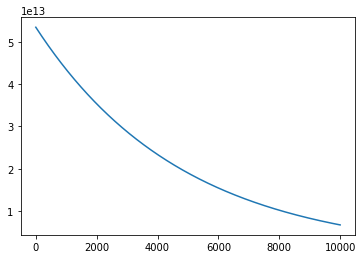

In [241]:
plt.plot(costs)

### validation

In [242]:
thetas, costs = gradient_descent(X_val,y_val,theta_0,linear_cost,linear_cost_gradient)

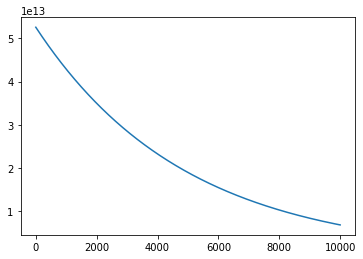

In [243]:
plt.plot(costs)

Como se observa en las gráficas, utilizando un polinomio grado 3 el modelo muestra un descenso más suavizado que en el grado 1, reflejando acercarse a la convergencia y en la parte final llegando a las 10,000 iteraciones casi parece alcanzar la convergencia.


# Conclusión

Finalmente se decidió que el modelo con mejor desempeño es el modelo de polinomio grado 3, ya que es el que casi alcanza la convergencia dentro de las 10,000 iteraciones. Adicionalmente se decidio trabajar con el lambda predeterminado debido a que los modelos presentaron un rendimiento estable tanto con los datos de test como los de cross validation. 